In [1]:
# https://pyimagesearch.com/2020/08/17/ocr-with-keras-tensorflow-and-deep-learning/

In [2]:
# import the necessary packages
import pandas as pd
import random
import numpy as np
# set the matplotlib backend so figures can be saved in the background
import matplotlib.pyplot as plt
# matplotlib.use("Agg")
# matplotlib.use('TkAgg')

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications import ResNet101
# from tensorflow.keras.applications import ResNet152

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import build_montages
import numpy as np
import argparse
import cv2

In [3]:
def load_az_dataset(csv_path):
    # initialize the list of data and labels
    data = pd.read_csv(csv_path) 
    # initialize the list of data and labels
    images = []
    labels = []

    for row in range(data.shape[0]):
        label = int(data.iloc[row, 0])
        image = np.array([int(col) for col in data.iloc[row, 1:]], dtype="uint8")
        # images are represented as single channel (grayscale) images
        # that are 28x28=784 pixels -- we need to take this flattened
        # 784-d list of numbers and repshape them into a 28x28 matrix
        image = image.reshape((28, 28))
        # update the list of data and labels
        images.append(image)
        labels.append(label)


    # convert the data and labels to NumPy arrays
    images = np.array(images, dtype="float32")
    labels = np.array(labels, dtype="int")
    # return a 2-tuple of the A-Z data and labels
    return (images, labels)

In [4]:
def load_mnist_dataset():
    # load the MNIST dataset and stack the training data and testing
    # data together (we'll create our own training and testing splits
    # later in the project)
    ((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
    data = np.vstack([trainData, testData])
    labels = np.hstack([trainLabels, testLabels])
    # return a 2-tuple of the MNIST data and labels
    return (data, labels)

In [5]:
# load the MNIST datasets

(digitsData, digitsLabels) = load_mnist_dataset()
digitsData, digitsLabels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [6]:
# load the AZ datasets

(azData, azLabels) = load_az_dataset('G:/My Drive/Ingegneria/Data Science GD/Models/TensorFlow/MNIST/A_Z Handwritten Data.csv')
azData, azLabels

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [7]:
digitsData.shape, digitsLabels.shape, azData.shape, azLabels.shape

((70000, 28, 28), (70000,), (372450, 28, 28), (372450,))

In [8]:
# the MNIST dataset occupies the labels 0-9, so let's add 10 to every
# A-Z label to ensure the A-Z characters are not incorrectly labeled as digits

azLabels += 10
print(np.unique(azLabels))

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35]


In [9]:
# stack the A-Z data and labels with the MNIST digits data and labels

data = np.vstack([azData, digitsData])
labels = np.hstack([azLabels, digitsLabels])

data.shape, labels.shape

((442450, 28, 28), (442450,))

In [10]:
# each image in the A-Z and MNIST digts datasets are 28x28 pixels;
# however, the architecture we're using is designed for 32x32 images, so we need to resize them to 32x32

data = [cv2.resize(image, (32, 32)) for image in data]
data = np.array(data, dtype="float32")
data.shape

(442450, 32, 32)

In [11]:
# add 1 channel dimension (or 3 channels) to every image in the dataset 

data_1ch = np.expand_dims(data, axis=-1)
print(data_1ch.shape)

data_3ch = np.concatenate([data_1ch] * 3, axis=-1)
print(data_3ch.shape)



(442450, 32, 32, 1)
(442450, 32, 32, 3)


In [12]:
# scale the pixel intensities of the images from [0, 255] down to [0, 1]

print(data_1ch.mean())
data_1ch /= 255.0
print(data_1ch.mean())

print(data_3ch.mean())
data_3ch /= 255.0
print(data_3ch.mean())

38.3715
0.1504762
38.371655
0.15047708


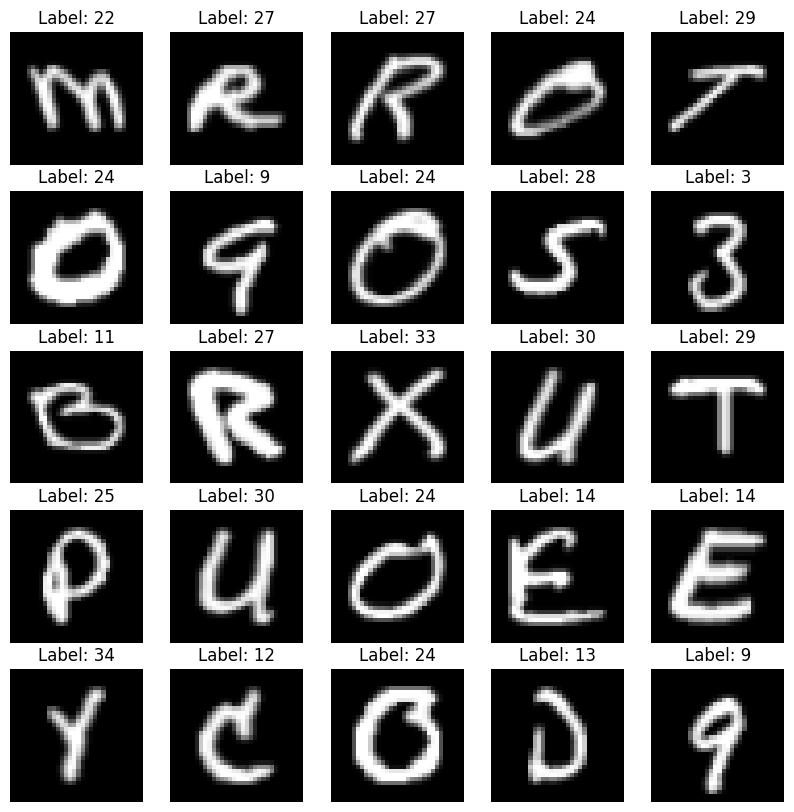

In [13]:
# Plot the first 25 images from the training dataset
plt.figure(figsize=(10, 10))
random.seed(777)
for i, j in enumerate(random.sample(range(data_1ch.shape[0], ), 25)):
    plt.subplot(5, 5, i+1)
    plt.imshow(data_1ch[j], cmap='gray')
    plt.title(f"Label: {labels[j]}")
    plt.axis('off')
plt.show()

In [14]:
# convert the labels from integers to vectors
le = LabelBinarizer()
print(np.unique(labels))
print(labels.shape)

labels_ohe = le.fit_transform(labels)
print(np.unique(labels_ohe))
print(labels_ohe.shape)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
(442450,)
[0 1]
(442450, 36)


In [15]:
# account for skew in the labeled data
classTotals = labels_ohe.sum(axis=0)
print(classTotals)
classWeight = {}

# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]
print(classWeight)

[ 6903  7877  6990  7141  6824  6313  6876  7293  6825  6958 13869  8668
 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586 12336 19010
 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272 10859  6076]
{0: 8.376792698826597, 1: 7.340992763742541, 2: 8.272532188841202, 3: 8.097605377398123, 4: 8.473769050410317, 5: 9.15967052114684, 6: 8.409685863874346, 7: 7.928835870012341, 8: 8.472527472527473, 9: 8.310577752227651, 10: 4.169370538611291, 11: 6.671089063221043, 12: 2.4702037677816224, 13: 5.7060390763765545, 14: 5.0546328671328675, 15: 49.72055030094583, 16: 10.035577924331829, 17: 8.011221945137157, 18: 51.629464285714285, 19: 6.808548216178029, 20: 10.320364090665715, 21: 4.990937338166753, 22: 4.6875, 23: 3.0418200946870066, 24: 1.0, 25: 2.989762680316426, 26: 9.94924294562973, 27: 4.999567698426422, 28: 1.1942625828703608, 29: 2.5705712380529007, 30: 1.993415609487038, 31: 13.827116212338593, 32: 5.362110534124629, 33: 9.21954719387755, 34: 5.3250759738465785, 3

In [16]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data_1ch, labels_ohe, test_size=0.15, stratify=labels, shuffle=True)
trainX.shape, testX.shape, trainY.shape, testY.shape

((376082, 32, 32, 1), (66368, 32, 32, 1), (376082, 36), (66368, 36))

In [17]:
# def build_resnet50(input_shape, num_classes, num_blocks, num_filters, reg):
#     base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    
#     '''
#     Preventing the base model's layers from being trained or modified when training the entire model. 
#     This is often done when using transfer learning, 
#     where the pre-trained weights of a base model are used as a starting point for a new task, 
#     and only the additional layers on top of the base model are trained. 
#     Freezing the base model's layers helps to preserve the learned representations in the base model 
#     and can prevent overfitting when training on limited data.
#     '''
#     # Freeze the base model's layers
#     base_model.trainable = False
    
#     # Get the output tensor from the last layer of the base model
#     x = base_model.output
    
#     # Flatten the output tensor
#     x = tf.keras.layers.Flatten()(x)
    
#     # Add a fully connected layer with 1024 units and ReLU activation
#     # to increase the model's capacity, introduce non-linearity, and apply regularization
#     x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg))(x)
    
#     # Add a final softmax layer for classification
#     predictions = Dense(num_classes, activation='softmax')(x)
    
#     # Create the model
#     model = Model(inputs=base_model.input, outputs=predictions)
    
#     return model


In [18]:
'''
In the second Conv2D layer, strides is set to 1 to ensure that the filter/kernel moves with a stride of 1. 
This is because the second convolutional layer is intended to maintain the spatial dimensions of the input feature map, 
as it is applied after the residual connection.
---
Then the third Conv2D, within the if condition, is applied in two cases:
1)
if the firse Conv2d has a stride !=1, it downsamples the input tensor (transforming it to 'x')
So, as we want to add 'x' and 'inputs' and tensor, downsampling both x and inputs, 
their spatial dimensions are aligned, allowing for a valid element-wise addition. 
2)
helps adjusting the number of channels in the input tensor (inputs.shape[-1]: 1 channel if greyscale, 3 channels if RGB) 
to match the number of filters.
This is because the dot product is computed element-wise between the filter and the input region, 
and the number of elements in both must be the same. 
If the number of channels does not match, the dot product cannot be computed, and the convolution operation cannot be performed.
---
Each ResNet block can be an identity block or a convolutional block depending on the identity parameter. 
When identity=True, the block implements the identity shortcut connection, otherwise, it implements the projection shortcut. 
This way, we can easily control the complexity of the model by changing the number of blocks in each stage.
'''


def resnet_block(inputs, filters, conv_size, strides=1, identity=False):
    x = Conv2D(filters, conv_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, conv_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if identity:
        x = Add()([x, inputs])
    else:
        identity = Conv2D(filters, 1, strides=strides, padding='same')(inputs)
        identity = BatchNormalization()(identity)
        x = Add()([x, identity])

    x = Activation('relu')(x)
    return x

def build_resnet34(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    for _ in range(3):
        x = resnet_block(x, 64, 3, identity=True)

    x = resnet_block(x, 128, 3, strides=2)
    for _ in range(3):
        x = resnet_block(x, 128, 3, identity=True)

    x = resnet_block(x, 256, 3, strides=2)
    for _ in range(5):
        x = resnet_block(x, 256, 3, identity=True)

    x = resnet_block(x, 512, 3, strides=2)
    for _ in range(2):
        x = resnet_block(x, 512, 3, identity=True)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.1)(x)  # Add dropout layer
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.007))(x)  # Add dense layer with regularization
    x = Dropout(0.3)(x)  # Add dropout layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [19]:
# Define the input shape and number of classes
input_shape = (32, 32, trainX.shape[3])  # Grayscale images have 1 channel, RGB have 3 channels
num_classes = trainY.shape[1] # 36 numbers and letters

# Build the ResNet-34 model
model = build_resnet34(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 64)   3200        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 16, 16, 64)   0           ['batch_normalization[0][0]']

In [20]:
'''
construct the image generator for data augmentation , to improve the results of our ResNet classifier
applying random modifications such as rotations, translations, scaling, flipping, and adding noise to the original images.
to increase the dataset size, improve generalization, enhance invariance to transformations, and regularize the model.
'''
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    fill_mode="nearest")

In [21]:
# initialize the number of epochs to train for, initial learning rate, and batch size
EPOCHS = 70
PATIENCE = 7
INIT_LR = 0.15
BS = 128

opt = SGD(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
'''
The learning rate is set to INIT_LR, and the decay is set to INIT_LR / EPOCHS. 
This means that the learning rate will decrease by a fraction of INIT_LR / EPOCHS after each epoch.
'''

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [22]:
# train the network
print("[INFO] training network...")

early_stopping_monitor = EarlyStopping(monitor='accuracy', patience=PATIENCE)

H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS,
    callbacks=[early_stopping_monitor],
    class_weight=classWeight,
    verbose=1)


[INFO] training network...
Epoch 1/70
2938/2938 [==============================] - 183s 59ms/step - loss: 13.3788 - accuracy: 0.4051 - val_loss: 1.5034 - val_accuracy: 0.7319
Epoch 2/70
2938/2938 [==============================] - 202s 69ms/step - loss: 2.5182 - accuracy: 0.8153 - val_loss: 0.6374 - val_accuracy: 0.8842
Epoch 3/70
2938/2938 [==============================] - 205s 70ms/step - loss: 1.6721 - accuracy: 0.8660 - val_loss: 0.4690 - val_accuracy: 0.9045
Epoch 4/70
2938/2938 [==============================] - 209s 71ms/step - loss: 1.3849 - accuracy: 0.8837 - val_loss: 0.4339 - val_accuracy: 0.8795
Epoch 5/70
2938/2938 [==============================] - 220s 75ms/step - loss: 1.2312 - accuracy: 0.8924 - val_loss: 0.4150 - val_accuracy: 0.8767
Epoch 6/70
2938/2938 [==============================] - 225s 76ms/step - loss: 1.1291 - accuracy: 0.8994 - val_loss: 0.3371 - val_accuracy: 0.8981
Epoch 7/70
2938/2938 [==============================] - 229s 78ms/step - loss: 1.0575 - ac

In [23]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BS)


[INFO] evaluating network...
519/519 [==============================] - 9s 16ms/step


In [24]:
# define the list of label names
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

# classification_report
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), 
                            target_names=labelNames))

              precision    recall  f1-score   support

           0       0.16      0.91      0.27      1036
           1       0.98      1.00      0.99      1182
           2       0.92      0.97      0.94      1049
           3       0.97      0.98      0.98      1071
           4       0.91      0.97      0.94      1024
           5       0.61      0.93      0.74       947
           6       0.95      0.97      0.96      1031
           7       0.96      1.00      0.98      1094
           8       0.93      0.97      0.95      1024
           9       0.96      0.99      0.97      1044
           A       0.99      0.99      0.99      2080
           B       0.99      0.95      0.97      1300
           C       0.99      0.98      0.99      3511
           D       0.95      0.96      0.96      1520
           E       0.99      0.98      0.98      1716
           F       0.97      1.00      0.99       174
           G       0.96      0.96      0.96       864
           H       0.96    

In [25]:
print(testY.argmax(axis=1)[222])
predictions.argmax(axis=1)[222]

28


28

In [26]:
# Specify the file path to save the model
model_path = "G:/My Drive/Ingegneria/Data Science GD/Models/TensorFlow/MNIST/model2.h5"

# Save the model to disk
print("[INFO] serializing network...")
model.save(model_path, save_format="h5")

[INFO] serializing network...


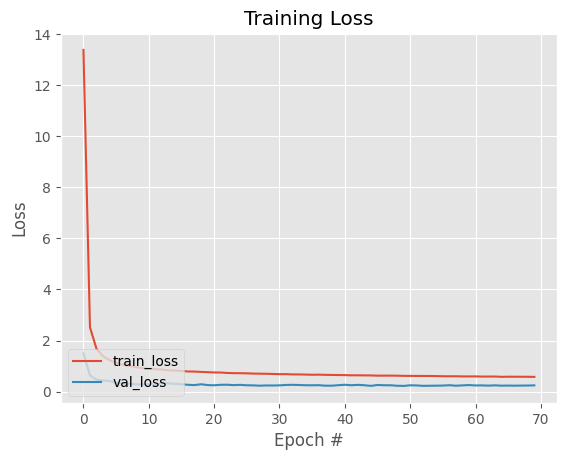

In [27]:
# construct a plot that plots and saves the training history
N_loss = [len(key) for value, key in H.history.items() if value=='loss'][0]
N_val_loss = [len(key) for value, key in H.history.items() if value=='val_loss'][0]
# actually all lines above provide the same result
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(N_loss), H.history["loss"], label="train_loss")
plt.plot(np.arange(N_val_loss), H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig('G:/My Drive/Ingegneria/Data Science GD/Models/TensorFlow/MNIST/loss.png')

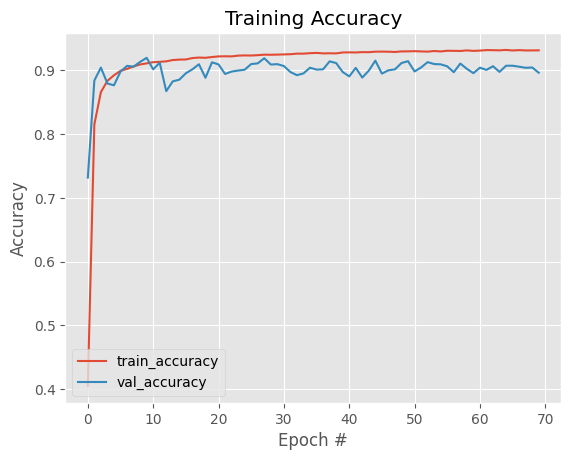

In [28]:
# construct a plot that plots and saves the training history
N_accuracy = [len(key) for value, key in H.history.items() if value=='accuracy'][0]
N_val_accuracy = [len(key) for value, key in H.history.items() if value=='val_accuracy'][0]
# actually all lines above provide the same result
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(N_accuracy), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(N_val_accuracy), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig('G:/My Drive/Ingegneria/Data Science GD/Models/TensorFlow/MNIST/accuracy.png')

1/1 [==============================] - 0s 29ms/step


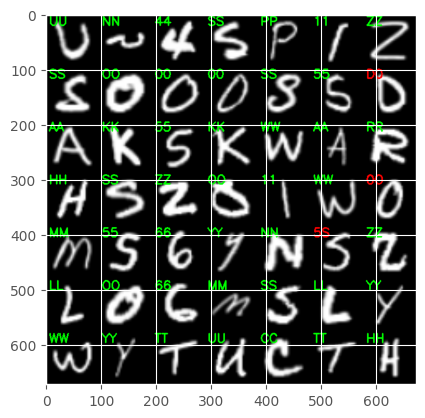

In [29]:
# initialize our list of output test images
images = []
# randomly select a few testing characters
for i in np.random.choice(np.arange(0, len(testY)), size=(49,)):
    # classify the character
    probs = model.predict(testX[np.newaxis, i]) #np.newaxis is used to increase the dimensionality testX[i] by one.
    prediction = probs.argmax(axis=1)
    label_pred = labelNames[prediction[0]]
    label_true = labelNames[np.argmax(testY[i])]
    # extract the image from the test data and initialize the text
    # label color as green (correct)
    image = (testX[i] * 255).astype("uint8")
    color = (0, 255, 0)
    # otherwise, the class label prediction is incorrect (red color)
    if prediction[0] != np.argmax(testY[i]):
        color = (255, 0, 0)
    # merge the channels into one image, resize the image from 32x32
    # to 96x96 so we can better see it and then draw the predicted label on the image
    image = cv2.merge([image] * 3) # convert a single-channel image into a three-channel image, for further image processing tasks that expect color images.
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label_pred+label_true, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2) # to put the label over the image
    # add the image to our list of output images
    images.append(image)
# construct the montage for the images
montage = build_montages(images, (96, 96), (7, 7))[0] # to combine multiple smaller images into a grid-like layout. 
# show the output montage
plt.imshow(montage)
